In [136]:
import torch
from torch.nn.utils.rnn import pack_sequence
import numpy as np
import time
import joblib
import matplotlib.pyplot as plt

In [2]:
[1 for _ in range(10)]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [4]:
out = (1 for _ in range(10))

In [5]:
print(out)

<generator object <genexpr> at 0x106cde750>


In [87]:
seq = torch.tensor([[0], [1], [2], [3], [4], [5]])

In [113]:
def sliding_window(data, lags):
    T, D = data.shape
    pre_lagged_data = [data[0:t] for t in range(1, lags)]
    lagged_data = [data[i:i+lags] for i in range(T-lags+1)]
    
    lagged_data = pre_lagged_data + lagged_data
    print(lagged_data)
    assert len(lagged_data) == T
    pack_seq = pack_sequence(lagged_data, enforce_sorted=False)
    return pack_seq

In [119]:
sliding_window(seq, 4)

[tensor([[0]]), tensor([[0],
        [1]]), tensor([[0],
        [1],
        [2]]), tensor([[0],
        [1],
        [2],
        [3]]), tensor([[1],
        [2],
        [3],
        [4]]), tensor([[2],
        [3],
        [4],
        [5]])]


PackedSequence(data=tensor([[0],
        [1],
        [2],
        [0],
        [0],
        [0],
        [1],
        [2],
        [3],
        [1],
        [1],
        [2],
        [3],
        [4],
        [2],
        [3],
        [4],
        [5]]), batch_sizes=tensor([6, 5, 4, 3]), sorted_indices=tensor([3, 4, 5, 2, 1, 0]), unsorted_indices=tensor([5, 4, 3, 0, 1, 2]))

In [82]:
seq = np.random.randn(90000,4)

In [83]:
lags = 50

In [84]:
start = time.time()
lagged_data = sliding_window(seq, lags)
end = time.time()
print(end-start)

0.5465703010559082


In [85]:
lagged_data.shape

(50, 89951, 4)

In [120]:
x = [1,2,3]

In [123]:
isinstance(x, (list, tuple, int))

True

In [124]:
a = dict(b=1, c=2)

In [125]:
d = dict(d=3, h=4)

In [127]:
a = {**a, **d}

In [145]:
numbers_dir = "/Users/leah/Columbia/courses/19summer/SocialBehavior/rslts/lstm_based/1014_test_lstmbased/v05_K6_dh10_dhs8_D191014_011319/checkpoint_0/numbers"

In [146]:
numbers = joblib.load(numbers_dir)

In [147]:
numbers.keys()

dict_keys(['x_predict_0', 'x_predict_5', 'z', 'sample_z', 'sample_x', 'sample_z_center', 'sample_x_center', 'samples_on_fixed_zs', 'losses'])

In [148]:
losses = numbers["losses"]

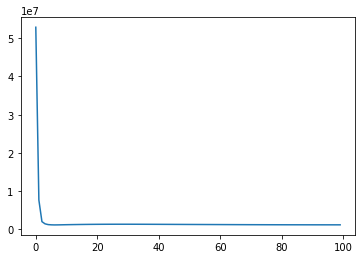

In [155]:
plt.plot(losses)

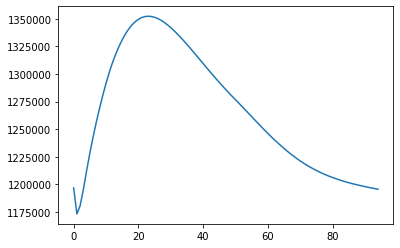

In [154]:
plt.plot(losses[5:])

In [143]:
losses[-1]

array(1136040.49249646)